### 1.1. Setup

Install required text processing libraries for the example

In [10]:
!pip install nltk  # This line installs the Natural Language Toolkit (NLTK) library using the pip package manager.

import nltk

nltk.download('stopwords')  # The code downloads NLTK resources, specifically the stopwords and punkt datasets. Stopwords are common words like "and," "the," etc., often removed in text processing. The punkt dataset is for tokenization, breaking text into words.
nltk.download('punkt')

from nltk.corpus import stopwords  # This line imports the stopwords module from NLTK, which contains a list of common words that are often removed from text during text processing to focus on meaningful words.

nltk.download('wordnet')  # This line downloads the WordNet dataset, a lexical database of the English language. WordNet is often used for lemmatization, which is the process of reducing words to their base or root form.
from nltk.stem import WordNetLemmatizer    # This code imports the WordNetLemmatizer class from NLTK's stem module and creates an instance of it. Lemmatization is a method for reducing words to their base or root form, helping in standardizing and normalizing text for analysis.
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rising.volkan007/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rising.volkan007/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rising.volkan007/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1.2. Creating Text Representations

Text data needs to be converted to numeric representations before they can be used to train deep learning models. The Spam classification feature data is converted to TF-IDF vectors and the target variable is converted to one-hot encoding.

In [11]:
import pandas as pd
import os                #This section imports the required libraries for data manipulation and machine learning. Pandas is used for handling data in tabular format, NumPy for numerical operations, and scikit-learn for machine learning-related functionalities.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#Load Spam Data and review content
spam_data = pd.read_csv("/Users/rising.volkan007/Desktop/Spam_Classification/Spam-Classification.csv")

print("\nLoaded Data :\n------------------------------------")
print(spam_data.head())

#Separate feature and target data
spam_classes_raw = spam_data["CLASS"]   # These lines create two variables, spam_classes_raw and spam_messages, which store the target variable (class labels, often denoting spam or not spam) and the feature variable (SMS messages), respectively. The "CLASS" column contains the target labels, and the "SMS" column contains the text messages.
spam_messages = spam_data["SMS"]



Loaded Data :
------------------------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [3]:

import nltk
import tensorflow as tf

#Custom tokenizer to remove stopwords and use lemmatization
def customtokenize(str):
    #Split string as tokens
    tokens=nltk.word_tokenize(str)
    #Filter for stopwords
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    #Perform lemmatization
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

#Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

#Transform feature input to TF-IDF
tfidf=vectorizer.fit_transform(spam_messages)
#Convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

#Build a label encoder for target variable to convert strings to numeric values.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(
                                spam_classes_raw)

#Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes,2)

print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

X_train,X_test,Y_train,Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.10)

/Users/rising.volkan007/miniforge3/envs/myenv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Matrix Shape :  (1500, 4566)
One-hot Encoding Shape :  (1500, 2)


##### Above code performs preprocessing for a spam classification task. It utilizes the NLTK library for natural language processing and TensorFlow for machine learning. The customtokenizer function is created to tokenize and lemmatize text while removing stopwords. The scikit-learn TfidfVectorizer is employed to convert SMS messages into TF-IDF vectors, providing a numerical representation of the text data. The target variable is label-encoded using scikit-learn's LabelEncoder and further one-hot encoded using TensorFlow. The shapes of the TF-IDF matrix and the one-hot encoded target variable are printed for inspection. Finally, the data is split into training and testing sets using scikit-learn's train_test_split function, facilitating the subsequent development of a spam classification model.

### 5.3. Building and Evaluating the Model

In [4]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#Setup Hyper Parameters for building the model
NB_CLASSES=2
N_HIDDEN=32

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(X_train.shape[1],),
                              name='Hidden-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                146144    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 147266 (575.26 KB)
Trainable params: 147266 (575.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Above code constructs a neural network model for spam classification using TensorFlow and Keras. It sets hyperparameters, including `NB_CLASSES` for the number of classes (2 for binary classification - spam or not spam) and `N_HIDDEN` for the number of hidden units in each dense layer (32). The model is sequential, starting with two hidden layers and ending with an output layer. The hidden layers use the rectified linear unit (ReLU) activation function, while the output layer uses softmax activation for multiclass classification. The model is compiled with categorical crossentropy loss, suitable for multiple classes, and accuracy is chosen as the evaluation metric. The `model.summary()` statement provides a concise overview of the model's architecture, layer types, and the number of parameters, aiding in understanding its structure and complexity. This code establishes the foundation for training a neural network to classify SMS messages as spam or not spam.


Training Progress:
------------------------------------
Epoch 1/10
5/5 [==============================] - 0s 26ms/step - loss: 0.6848 - accuracy: 0.6472 - val_loss: 0.6642 - val_accuracy: 0.7259
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6378 - accuracy: 0.8704 - val_loss: 0.6140 - val_accuracy: 0.8704
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.5747 - accuracy: 0.9565 - val_loss: 0.5607 - val_accuracy: 0.9111
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.5098 - accuracy: 0.9722 - val_loss: 0.5096 - val_accuracy: 0.9370
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 0.4473 - accuracy: 0.9833 - val_loss: 0.4600 - val_accuracy: 0.9370
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 0.3876 - accuracy: 0.9880 - val_loss: 0.4136 - val_accuracy: 0.9481
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 0.3332 - accuracy: 0.9907 - val_loss: 0.3714

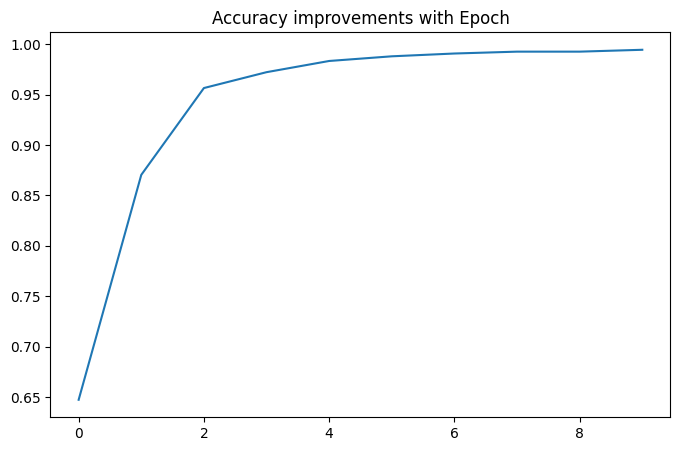


Evaluation against Test Dataset :
------------------------------------
5/5 [==============================] - 0s 3ms/step - loss: 0.2717 - accuracy: 0.9600


[0.27168041467666626, 0.9599999785423279]

In [5]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training
BATCH_SIZE=256
EPOCHS=10
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

##### In summary, this part of the code trains the neural network model, monitors the training progress, visualizes the improvement in training accuracy over epochs, and evaluates the final performance on a separate test dataset. The verbosity setting allows for detailed output during the training process.

### 5.4. Predicting for Text

In [9]:
#Predict for multiple samples using batch processing

#Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf=vectorizer.transform(["Click here to get it free!",
                                    "Yup I will come over"]).toarray()

print(predict_tfidf.shape)

#Predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1 )
print("Prediction Output:" , prediction)

#Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(2, 4566)
1/1 [==============================] - 0s 12ms/step
Prediction Output: [1 0]
Prediction Classes are  ['spam' 'ham']


##### In summary, this code segment demonstrates how to use the trained neural network model to predict the classes of multiple text samples. The samples are first transformed into TF-IDF vectors using the same vectorizer model used during training. The model then predicts the classes for these vectors, and the results are printed, showing both the numeric predictions and the corresponding class labels.